# **EE7204 Computer vision and Image Processing - Assignment 01**

EG/2018/3382 - Madawalage D M K N V

---



 

# 1.   Python code to reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2.


Enter number of intensity levels: 2


Text(0.5, 1.0, '2 intensity levels')

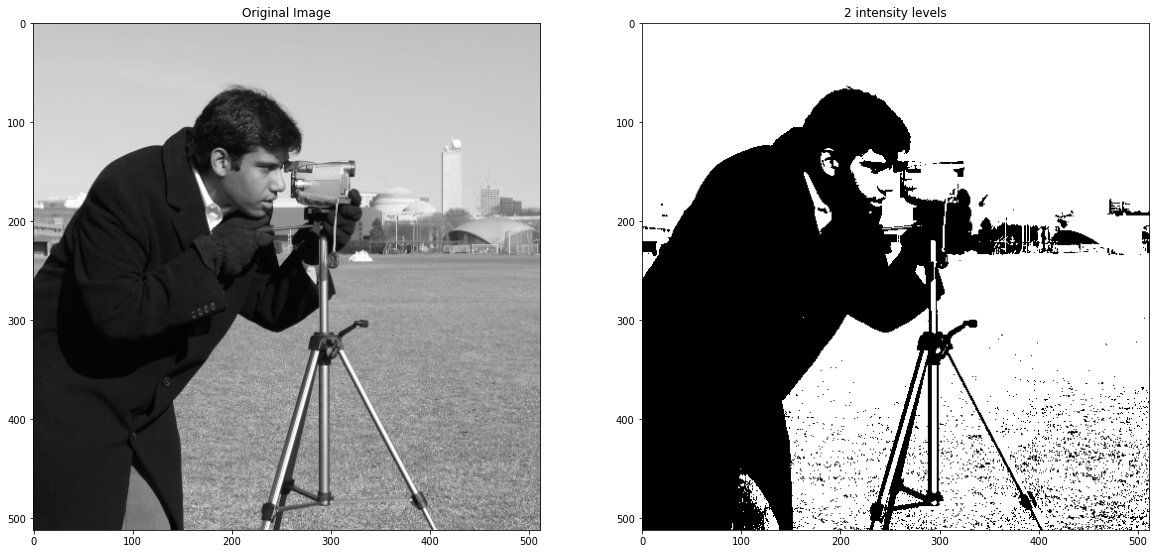

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.camera()
levels = int(input("Enter number of intensity levels: "))
reducedImage = np.round(image/(255/(levels-1)))*(255/(levels-1))
fig,array = plt.subplots(1,2)

array[0].imshow(image)
array[0].set_title('Original Image')

array[1].imshow(reducedImage)
array[1].set_title('{} intensity levels'.format(levels))

---
# 2.   Loading an image and performing spatial average of image pixels.

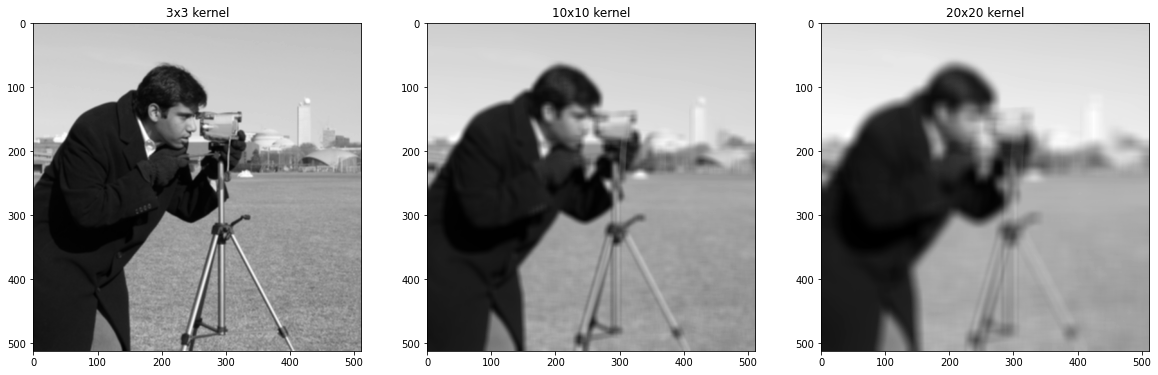

In [25]:
f, array = plt.subplots(1, 3)
array[0].imshow(cv2.blur(image,(3,3)))
array[0].set_title('3x3 kernel')

array[1].imshow(cv2.blur(image,(10,10)))
array[1].set_title('10x10 kernel')

array[2].imshow(cv2.blur(image,(20,20)))
array[2].set_title('20x20 kernel');

---
# 3.   Rotating the image by 45 degrees and 90 degrees.

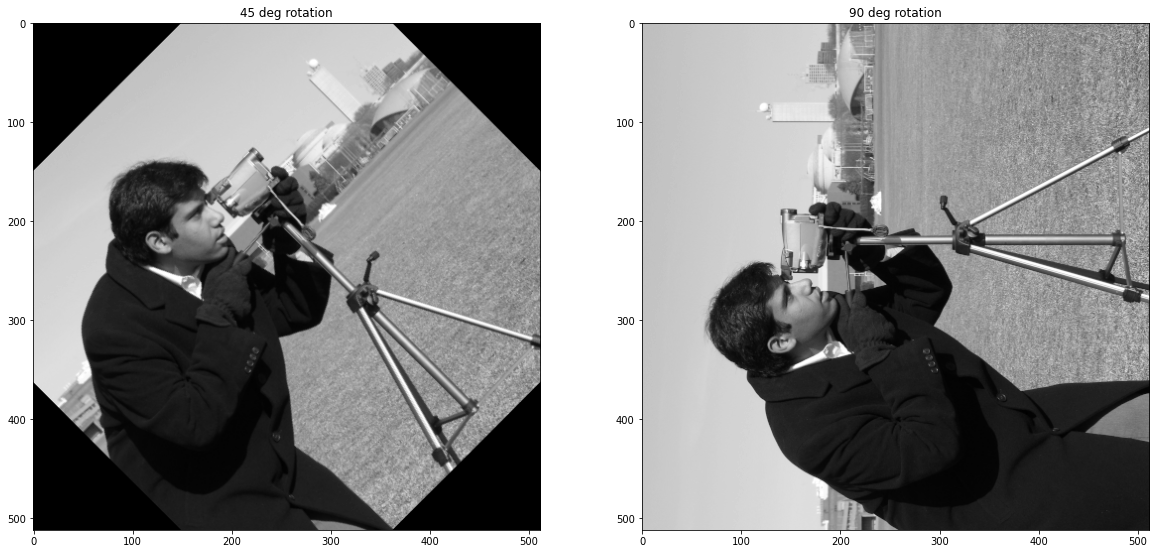

In [23]:
rows,cols = image.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
img_45 = cv2.warpAffine(image,M,(cols,rows))

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img_90 = cv2.warpAffine(image,M,(cols,rows))

f, array = plt.subplots(1, 2)
array[0].imshow(img_45)
array[0].set_title('45 deg rotation')

array[1].imshow(img_90)
array[1].set_title('90 deg rotation');

---
# 4.   Reducing the image spatial resolution.

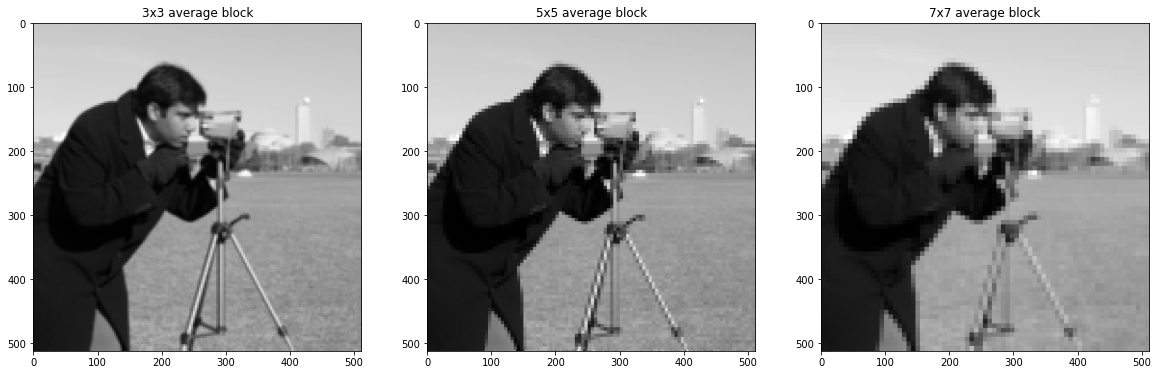

In [24]:
STRIDE = (3,5,7)
rows,cols = image.shape

f, array = plt.subplots(1, len(STRIDE))
for i,S in enumerate(STRIDE):
    x = round(S/2)
    modifiedImage = image.copy()
  
    for r in range(x,rows,S):
        for c in range(x,cols,S):
            modifiedImage[r-x:r+x+1,c-x:c+x+1] = np.average(image[r-x:r+x+1,c-x:c+x+1])
    array[i].imshow(modifiedImage);
    array[i].set_title('{}x{} average block'.format(S,S))